In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
import pandas as pd
import numpy as np
import ast
import time

In [325]:
class scan_cave():
    def __init__(self,n_rows,height,dimensions = 3, off_set = 0):
        self.n_rows = n_rows+1 -off_set
        self.height = height+1
        self.current_image = np.zeros((self.height,self.n_rows,dimensions))
        self.eternity_found = False
        self.log_of_eternity = None
        self.off_set = off_set
        self.roof_found = False
        self.roof = None
        self.state = 0
    
    def draw_cave(self, save_pic = False):
        fig, ax = plt.subplots(figsize=(15,10))
        plt.imshow(self.current_image)
        plt.show()
        if self.state % 2 == 0:
            plt.imsave(f"pictures/{self.state}.jpg", self.current_image)
        
        self.state += 1
    
    def add_stone(self,stone_coordinates):
        """
        This function takes a sequence of start and end stone coordinates as input and calculates all
        coordinates for the sequence and adds this to the cave scan
        """
        # And empty container for all the sequences to be added
        coord_all = []
        
        # the function iterates over all coordinates in the type (x,y) except the final
        for i in range(len(stone_coordinates)-1):
            
            # Some coordinates moves from larger values to smaller, which the range() function cannot work with,
            # so the values are reversed, the coordinates are calculated and the list reversed in the end
            reverse = False
            
            # The x and y values are zipped
            list_coord = [*zip(stone_coordinates[i],stone_coordinates[i+1])]
            row_start = list_coord[1][0]
            row_end = list_coord[1][1]

            column_start = list_coord[0][0] - self.off_set
            column_end = list_coord[0][1] - self.off_set
            
            
            # either x or y value will be the same, when stones aren't added diagonally, so a sequence is calucalated
            # by the one with different values
            if row_start != row_end:

                if row_start > row_end:
                    row_start, row_end = row_end, row_start
                    reverse = True

                row_coord = range(row_start,row_end+1)
                new_coord = []
                for i in row_coord:
                    coord = (i,column_start)
                    new_coord.append(coord)

                if reverse == True:
                    new_coord.reverse()
                coord_all.append(new_coord)



            if column_start != column_end:

                if column_start > column_end:
                    column_start,column_end = column_end,column_start
                    reverse = True

                column_coord = range(column_start,column_end+1)
                new_coord = []
                for i in column_coord:
                    coord = (row_start,i)
                    new_coord.append(coord)

                if reverse == True:
                    new_coord.reverse()
                coord_all.append(new_coord)
        
        for list_coord in coord_all:
            for item in list_coord:
                self.current_image[item[0],item[1]] = [1,1,1]
                
    def cave_values(self):
        return self.current_image
    
    def add_sand(self,start_x=7,start_y=0):
        """
        Add a stream of sand, the function continues, till the sand is at rest, then the pixel is painted yellow.
        
        If the stream to eternity is found (if the sand can leave the boundaries of the matrix), then eternity_found is
        set to True, and the function will not run again.
        
        """
        if self.eternity_found == True:
            return self.log_of_eternity
        
        if self.roof_found == True:
            return self.log
        
        stop = False
        log = []
        
        current_y = start_y
        current_x = start_x - self.off_set

        while stop == False:
            # I keep a log of the sequence of each passage
            log.append((current_x,current_y))
            
            if current_y >= self.height-1:
                # If I find eternity I change found_eternity and update the route to eternity
                self.eternity_found = True
                self.log_of_eternity = log
                break
            
            
            
            # Underneath I check first whether the pixel underneath has a zero value in the first color dimension, 
            # if not, then I check the pixel to the left
            # If not, then i check the one to the right.
            # If all three pixels underneath are colored, I change the color of the current pixel and stop the loop
            next_pos = cave.cave_values()[current_y+1,current_x,0]
            if next_pos == 0:
                current_y += 1
                continue

            elif next_pos == 1:
                left = cave.cave_values()[current_y+1,current_x-1,0]

                if left == 0:
                    current_y += 1
                    current_x -= 1
                    continue

                elif left == 1:
                    right = cave.cave_values()[current_y+1,current_x+1,0]

                    if right == 0:
                        
                        
                        current_y += 1
                        current_x += 1

                    else:
                        if current_y==0:
                            self.roof_found=True
                            break
                        stop = True
        
        if current_y <= self.height-1:
            self.current_image[current_y,current_x] = [1,1,0]

        return log
    
    def sand_to_eternity(self,sleep=0.5,draw=True,start_y=0,start_x=7):
        """
        The function start sending sand from the given pixel and stops when eternity is found. It returns the value
        of the number of iterations till the step before eternity.
        
        It also draws the image, unless specified not to.
        """
        i = 0
        while self.roof_found == False:
            log = cave.add_sand(start_x,start_y)
            if draw==True:
                
                cave.draw_cave()
                clear_output(wait=True)
            time.sleep(sleep)
            i += 1
        return i

In [223]:
bool(True+False)

True

In [335]:
with open("input.txt") as f:
    stone_vectors = f.read()
stone_vectors = stone_vectors.split("\n")

stone_coordinates = []

stone_vectors = [sequence.split(" -> ") for sequence in stone_vectors]
for sequence in stone_vectors[:-1]:
    stone_seq =[ast.literal_eval(coord) for coord in sequence]
    stone_seq = [(coord[0],coord[1]) for coord in stone_seq]
    stone_coordinates.append(stone_seq)

In [336]:
min_x = 1000

max_x = 0
max_y = 0
for seq in stone_coordinates:
    for coord in seq:
        if coord[0] > max_x:
            max_x=coord[0]
        if coord[0] < min_x:
            min_x = coord[0]
        if coord[1] > max_y:
            max_y = coord[1]

            

In [337]:
print(min_x,max_x)

483 537


In [338]:
max_y

165

In [339]:
center = min_x+((max_x-min_x)//2)
off_set = center-max_y -20

In [340]:
off_set

325

In [341]:
max_x_off_set = center + max_y + 5

In [342]:
cave = scan_cave(max_x_off_set,max_y+3,off_set=off_set)

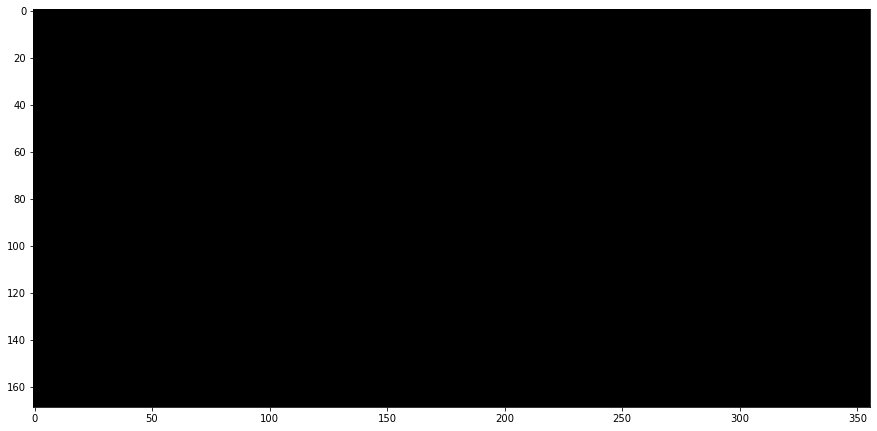

In [343]:

cave.draw_cave()

In [344]:
i = 0
for seq in stone_coordinates:
    i += 1
    cave.add_stone(seq)

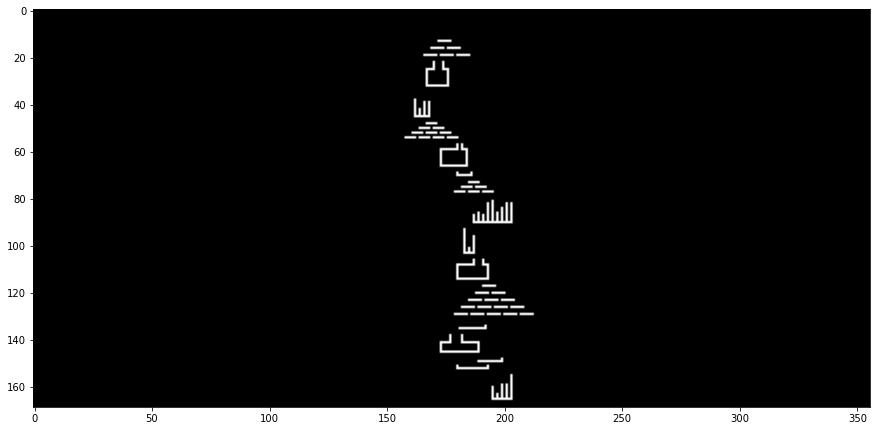

In [345]:

cave.draw_cave()

In [346]:
floor = [(328,max_y+2),(max_x_off_set-2,max_y+2)]
floor

[(328, 167), (678, 167)]

In [347]:
cave.add_stone(floor)

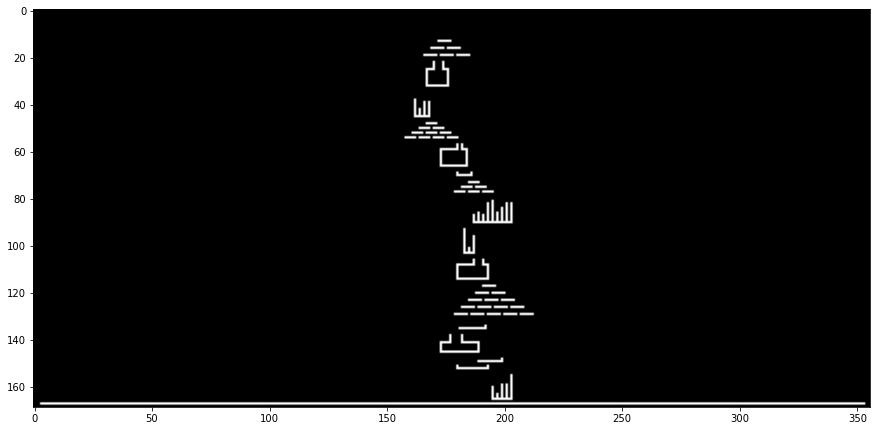

In [348]:

cave.draw_cave()

In [349]:
cave.sand_to_eternity(start_x=500,sleep=0, draw=False)

26484

In [ ]:
plt.imshow(cave.cave_values())
plt.imsave("pictures/2.jpg", cave.cave_values())

In [326]:
cave = scan_cave(530,13,off_set=450)

In [327]:
floor = [(470,11),(529,11)]
cave.add_stone(floor)

In [328]:
stone_coordinates = "503,4 -> 502,4 -> 502,9 -> 494,9".split(" -> ")
stone_coordinates =[ast.literal_eval(coord) for coord in stone_coordinates]
stone_coordinates = [(coord[0],coord[1]) for coord in stone_coordinates]

In [329]:
stone_coordinates

[(503, 4), (502, 4), (502, 9), (494, 9)]

In [330]:
cave.add_stone(stone_coordinates)

In [331]:

stone_coordinates = "498,4 -> 498,6 -> 496,6".split(" -> ")
stone_coordinates =[ast.literal_eval(coord) for coord in stone_coordinates]
stone_coordinates = [(coord[0],coord[1]) for coord in stone_coordinates]

In [332]:
cave.add_stone(stone_coordinates)

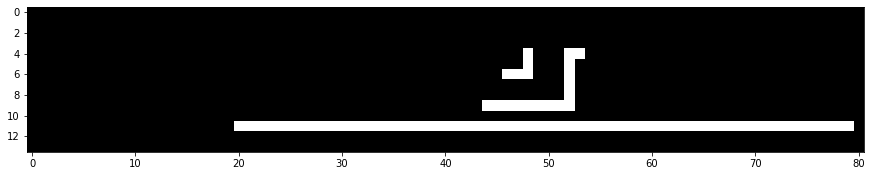

In [333]:
cave.draw_cave()

In [334]:
cave.sand_to_eternity(sleep=0.1,start_x=500)

93

In [357]:
cave.height

10

In [361]:
logOflog = []
for i in range(25):
    log = cave.add_sand()
    logOflog.append(log)
    cave.draw_cave()
    clear_output(wait=True)
    time.sleep(0.2)

Eternity is found!


KeyboardInterrupt: 

In [359]:
cave.log_of_eternity

[(0, 7), (0, 8), (0, 9)]

In [92]:
start_x = 6
start_y = 0
stop = False
log = []

while stop == False:
    log.append((start_x,start_y))
    next_pos = cave.cave_values()[start_y+1,start_x,0]
    if next_pos == 0:
        start_y += 1
        continue
    
    elif next_pos == 1:
        left = cave.cave_values()[start_y+1,start_x-1,0]
        
        if left == 0:
            start_y += 1
            start_x -= 1
            continue
        
        elif left == 1:
            right = cave.cave_values()[start_y+1,start_x+1,0]
            
            if right == 0:
                start_y += 1
                start_x += 1
            
            else:
                stop = True
                print("I stopped with coordinate: ", (start_x,start_y))
    
    

I stopped with coordinate:  (6, 8)


In [90]:
log

[(6, 0), (6, 1), (6, 2), (5, 3), (5, 4)]

In [51]:
stone_coordinates

[(9, 4), (8, 4), (8, 9), (0, 9)]

In [23]:
for i in range(len(stone_coordinates)-1):
    print([*zip(stone_coordinates[i],stone_coordinates[i+1])])

[(4, 4), (4, 6)]
[(4, 2), (6, 6)]


In [33]:
coord_all = []
for i in range(len(stone_coordinates)-1):
    reverse = False
    
    list_coord = [*zip(stone_coordinates[i],stone_coordinates[i+1])]
    row_start = list_coord[0][0]
    row_end = list_coord[0][1]
    
    column_start = list_coord[1][0]
    column_end = list_coord[1][1]
    
    if row_start != row_end:
        
        if row_start > row_end:
            row_start, row_end = row_end, row_start
            reverse = True
        
        row_coord = range(row_start,row_end+1)
        new_coord = []
        for i in row_coord:
            coord = (i,column_start)
            new_coord.append(coord)
        
        if reverse == True:
            new_coord.reverse()
        coord_all.append(new_coord)
            
        
        
    if column_start != column_end:
        
        if column_start > column_end:
            column_start,column_end = column_end,column_start
            reverse = True
        
        column_coord = range(column_start,column_end+1)
        new_coord = []
        for i in column_coord:
            coord = (row_start,i)
            new_coord.append(coord)
            
        if reverse == True:
            new_coord.reverse()
        coord_all.append(new_coord)
        
        

In [39]:
for list_coord in coord_all:
    for item in list_coord:
        empty_array[item[0],item[1]] = [1,1,1]

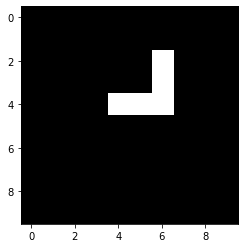

In [40]:
# empty_array = np.zeros((10,10,3))
plt.imshow(empty_array)